# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../data/absences.csv")
data.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

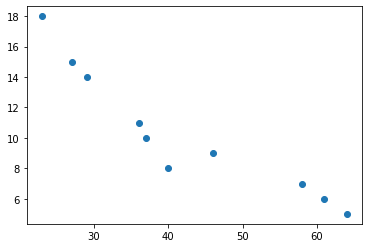

In [2]:
# your code here
plt.scatter(data["Age"], data["Absences"])

In [5]:
# your comments here
'''
it seems that my suspicion is true, the younger the employee is, the more likely the employee wont come to work

'''

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [3]:
# your code here

def slope_intercept(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    sum_num = []
    sum_den = []
    for i in range(len(x)):
        sum_num.append(((x[i] - x_mean)*(y[i] - y_mean)))
        sum_den.append((x[i] - x_mean)**2)
        slope = sum(sum_num)/sum(sum_den)
        intercept = y_mean - (slope*x_mean)
    
    return slope, intercept
    
    

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

(-0.2681088337033404, 21.58738189891063)


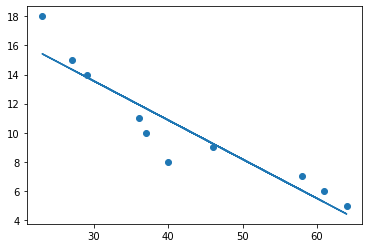

In [4]:
# your code here
age = pd.Series(data["Age"])
absence = pd.Series(data["Absences"])

print(slope_intercept(age, absence))

plt.scatter(age, absence)
m, b = np.polyfit(age, absence, 1)
plt.plot(age, m*age + b)

In [8]:
# your comments here

'''
We can see the regression line related to the scatter plot 

'''


#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [40]:
# your code here
def covar_and_corr(x, y):
    covariance = np.cov(x, y)
    correlation = np.corrcoef(x, y)
    
    return covariance, correlation

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [43]:
# your code here
covar_and_corr(age, absence)

(array([[215.21111111, -57.7       ],
        [-57.7       ,  17.78888889]]),
 array([[ 1.        , -0.93254341],
        [-0.93254341,  1.        ]]))

In [ ]:
# your comments here

"""

The covariance is negative which means the direction of the relationship of the two variables is the opposite
The more in X the less in Y and viceversa.

The correlation is very close to -1, which means the variables are closely related.
Since it is negative, if one variable changes, the other variable changes in the opposite direction.


"""

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here
'''
I can confirm that the age is an indicator of absenteism since they are closely related.
The younger you are the more likely you are to skip work

'''

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [44]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

In [48]:
X = pd.Series(ironbeers_df["X"])
Y = pd.Series(ironbeers_df["Y"])

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [49]:
# your code here
def covar_and_corr(x, y):
    covariance = np.cov(x, y)
    correlation = np.corrcoef(x, y)
    
    return covariance, correlation

covar_and_corr(X, Y)

(array([[18.85714286, 12.        ],
        [12.        ,  8.        ]]),
 array([[1.        , 0.97700842],
        [0.97700842, 1.        ]]))

In [ ]:
# your comments here

'''
The covariance is positive which tells us the direction of the relationship between variables. the more X the more Y

The correlacion is close to 1 which tells us is closely related.
since it is positive, if one variable changes the other changes in the same direction.

'''

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

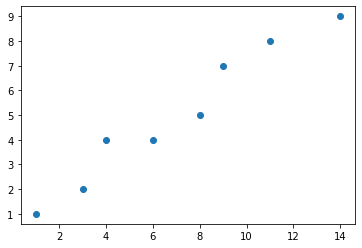

In [53]:
# your code here
plt.scatter(X, Y)


In [ ]:
# your comments here

'''
Highly correlated variables
'''

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

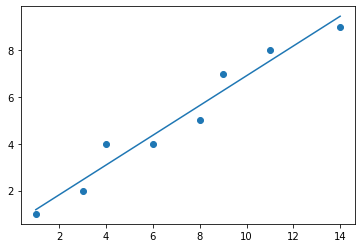

In [55]:
# your code here
plt.scatter(X, Y)
m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b)

In [ ]:
# your comments here

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here

'''
My conclusion is that I'm the reason that people are not staying for the ironbeers on friday

'''


## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here